<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
## Write your code here
# column names
df.columns

# datatype
df.dtypes # or
df.info()

# statical summary
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


<bound method NDFrame.describe of        ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employ

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [11]:
## Write your code here
missing_data =  df.isna()
missing_data_count= df.isna().sum()
missing_data_count

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [12]:
# Drop columns with more than 50% missing values
# threshold = len(df) * 0.5
# df = df.dropna(thresh=threshold, axis=1)

# Drop rows missing key fields like Country or Language
df = df.dropna(subset=['Country', 'LanguageHaveWorkedWith'])

# Impute missing values
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', 0.5)
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', 51)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Fill missing values with median
df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].median())

# impute values for categorical columns
df['Employment'] = df['Employment'].fillna('Unknown')

# Verify cleaned data
print("Remaining missing values:\n", df.isnull().sum()[df.isnull().sum() > 0])



C:\Users\HP\AppData\Local\Temp\ipykernel_2736\761006924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', 0.5)
C:\Users\HP\AppData\Local\Temp\ipykernel_2736\761006924.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', 51)
C:\Users\HP\AppData\Local\Temp\ipykernel_2736\761006924.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Remaining missing values:
 RemoteWork              9038
CodingActivities        9036
LearnCode                143
LearnCodeOnline        10400
TechDoc                18065
                       ...  
JobSatPoints_11        28385
SurveyLength            2057
SurveyEase              1996
ConvertedCompYearly    34327
JobSat                 28682
Length: 105, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [16]:
## Write your code here
# Display value counts for key columns
print("Employment Distribution:")
df['Employment'].value_counts(dropna=False).reset_index()

Employment Distribution:


,Employment,count
0,"Employed, full-time",34676
1,"Independent contractor, freelancer, or self-em...",4351
2,"Student, full-time",4026
3,"Employed, full-time;Independent contractor, fr...",3226
4,"Not employed, but looking for work",2010
...,...,...
97,"Student, full-time;Independent contractor, fre...",1
98,"Independent contractor, freelancer, or self-em...",1
99,"Employed, full-time;Student, full-time;Not emp...",1
100,"Employed, full-time;Student, full-time;Indepen...",1


In [17]:
print("\nJob Satisfaction Distribution:")
df['JobSat'].value_counts(dropna=False).reset_index()


Job Satisfaction Distribution:


,JobSat,count
0,NaN,28682
1,8.0,7480
2,7.0,6359
3,6.0,3742
4,9.0,3617
5,10.0,2232
6,5.0,1933
7,3.0,1163
8,4.0,1124
9,2.0,767


In [18]:
print("\nProfessional Coding Experience Distribution:")
df['YearsCodePro'].value_counts(dropna=False).reset_index()


Professional Coding Experience Distribution:


,YearsCodePro,count
0,8.0,10478
1,2.0,3975
2,3.0,3876
3,5.0,3385
4,10.0,3135
5,4.0,3068
6,6.0,2728
7,0.5,2678
8,1.0,2493
9,7.0,2450


### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


C:\Users\HP\AppData\Local\Temp\ipykernel_2736\1510158094.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JobSat_numeric'] = df['JobSat'].map({
C:\Users\HP\AppData\Local\Temp\ipykernel_2736\1510158094.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(job_sat_numeric, shade=True, color='skyblue')


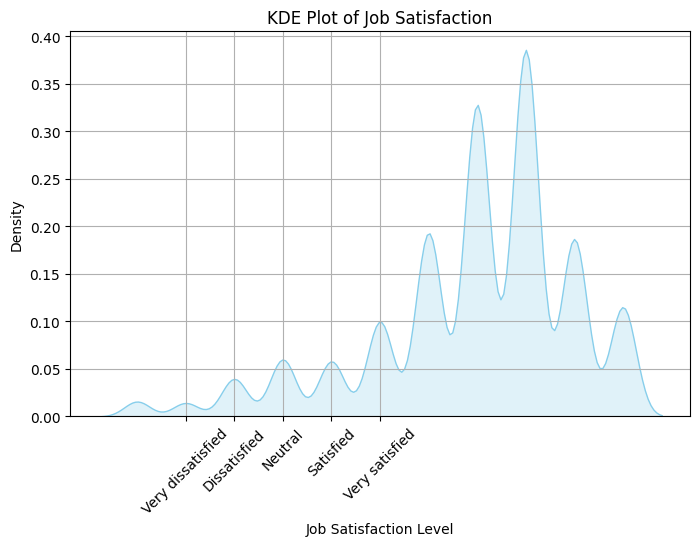

In [24]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Convert JobSat to numeric if needed
df['JobSat_numeric'] = df['JobSat'].map({
    'Very dissatisfied': 1,
    'Dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Satisfied': 4,
    'Very satisfied': 5
})

# Drop missing values
job_sat_numeric = df['JobSat'].dropna()

# Plot KDE
plt.figure(figsize=(8, 5))
sns.kdeplot(job_sat_numeric, shade=True, color='skyblue')
plt.title('KDE Plot of Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Density')
plt.xticks([1, 2, 3, 4, 5], 
           ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied'], rotation=45)
plt.grid(True)
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


C:\Users\HP\AppData\Local\Temp\ipykernel_2736\4272780769.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_langs['HaveWorkedWith'] = df_langs['LanguageHaveWorkedWith'].str.split(';')
C:\Users\HP\AppData\Local\Temp\ipykernel_2736\4272780769.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_langs['WantToWorkWith'] = df_langs['LanguageWantToWorkWith'].str.split(';')


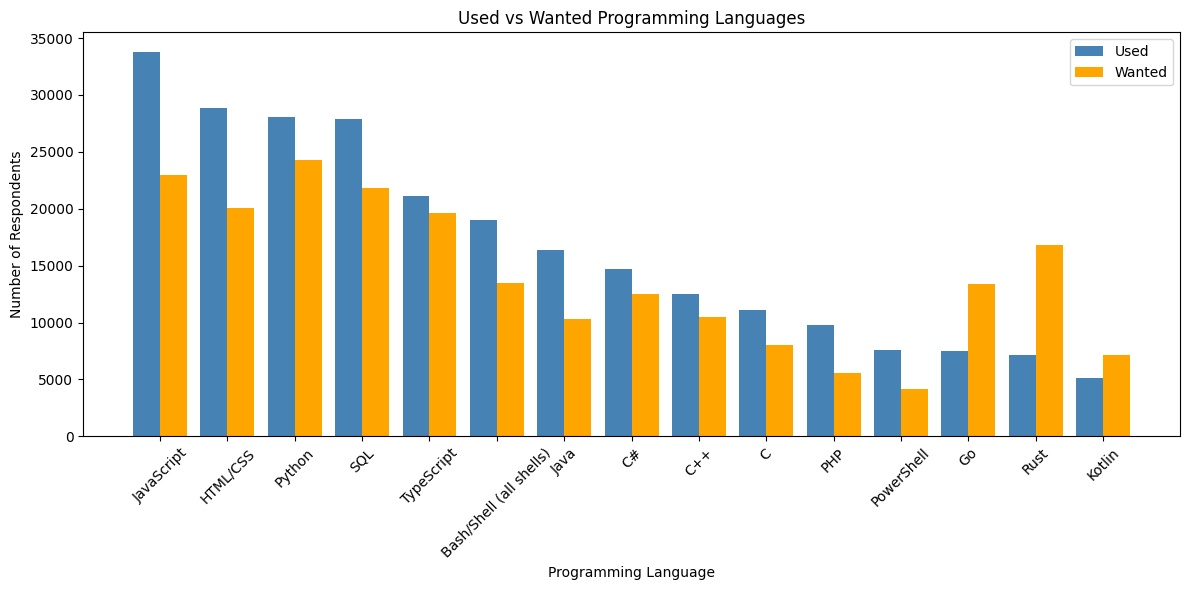

In [26]:
# Drop rows with missing language info
df_langs = df.dropna(subset=['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'])

# Explode both columns
df_langs['HaveWorkedWith'] = df_langs['LanguageHaveWorkedWith'].str.split(';')
df_langs['WantToWorkWith'] = df_langs['LanguageWantToWorkWith'].str.split(';')

df_have = df_langs.explode('HaveWorkedWith')
df_want = df_langs.explode('WantToWorkWith')

have_counts = df_have['HaveWorkedWith'].value_counts()
want_counts = df_want['WantToWorkWith'].value_counts()

# Combine into one DataFrame
lang_compare = pd.DataFrame({
    'Used': have_counts,
    'Wanted': want_counts
}).fillna(0).astype(int)

lang_compare = lang_compare.sort_values(by='Used', ascending=False)

import matplotlib.pyplot as plt

top_langs = lang_compare.head(15)  # Top 15 for clarity

plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(top_langs))

plt.bar(x, top_langs['Used'], width=bar_width, label='Used', color='steelblue')
plt.bar([i + bar_width for i in x], top_langs['Wanted'], width=bar_width, label='Wanted', color='orange')

plt.xticks([i + bar_width / 2 for i in x], top_langs.index, rotation=45)
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.title('Used vs Wanted Programming Languages')
plt.legend()
plt.tight_layout()
plt.show()



In [28]:
!pip install matplotlib-venn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45437 sha256=54ae770ca502845c8ecc70e7cdd75eb0dea9e308202b35a95128e01ffbe2e900
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\d1\5f\e6\771479559f992b8398265ebf61f8a3d33ca0b8f75552e06ad2
Successfully built matplotlib-venn


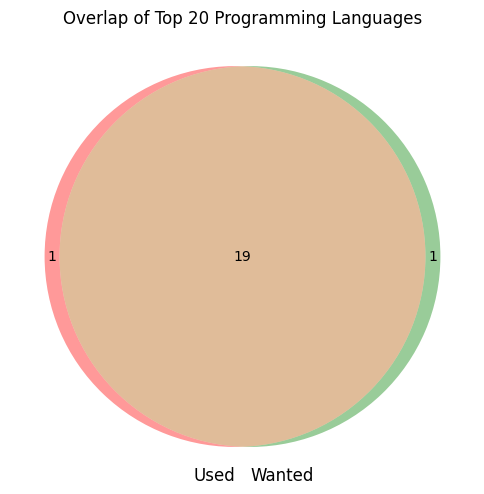

In [29]:
from matplotlib_venn import venn2

used_set = set(have_counts.head(20).index)
wanted_set = set(want_counts.head(20).index)

plt.figure(figsize=(6, 6))
venn2([used_set, wanted_set], set_labels=('Used', 'Wanted'))
plt.title('Overlap of Top 20 Programming Languages')
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


C:\Users\HP\AppData\Local\Temp\ipykernel_2736\2946001827.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = df['Country'].map(country_to_region)


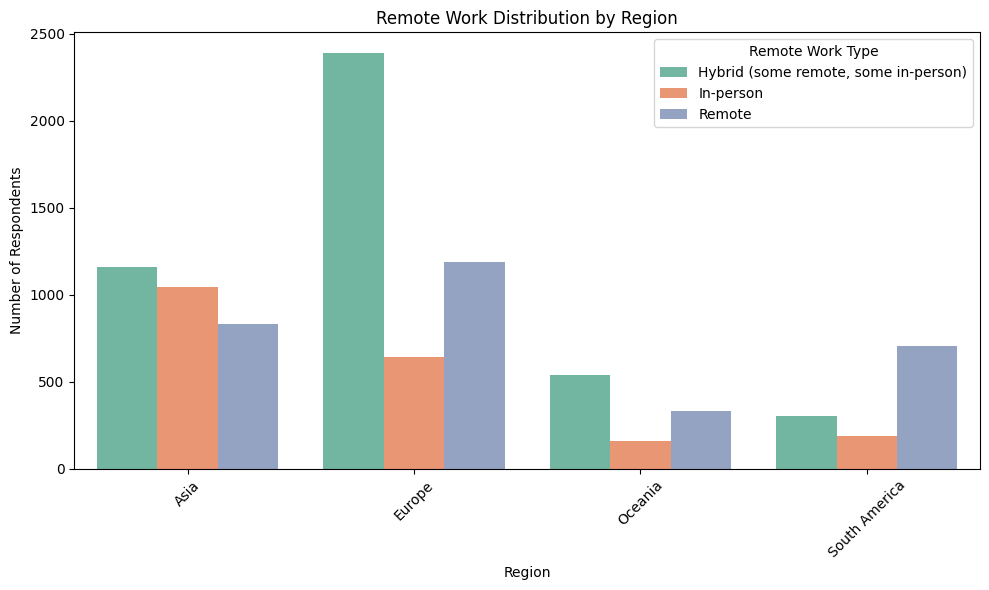

In [30]:
## Write your code here
# Example mapping (simplified)
country_to_region = {
    'India': 'Asia',
    'United States': 'North America',
    'Germany': 'Europe',
    'Brazil': 'South America',
    'Australia': 'Oceania',
    # Add more countries as needed
}

# Map countries to regions
df['Region'] = df['Country'].map(country_to_region)

# Drop missing values
df_remote = df.dropna(subset=['RemoteWork', 'Region'])

# Group and count
remote_counts = df_remote.groupby(['Region', 'RemoteWork']).size().reset_index(name='Count')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=remote_counts, x='Region', y='Count', hue='RemoteWork', palette='Set2')
plt.title('Remote Work Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Remote Work Type')
plt.tight_layout()
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


C:\Users\HP\AppData\Local\Temp\ipykernel_2736\3647384838.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['YearsCodePro'] = df_clean['YearsCodePro'].replace('Less than 1 year', 0.5)
C:\Users\HP\AppData\Local\Temp\ipykernel_2736\3647384838.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['YearsCodePro'] = df_clean['YearsCodePro'].replace('More than 50 years', 51)
C:\Users\HP\AppData\Local\Temp\ipykernel_2736\3647384838.py:8: SettingWithCopyWarning: 
A value is trying to be set on a co

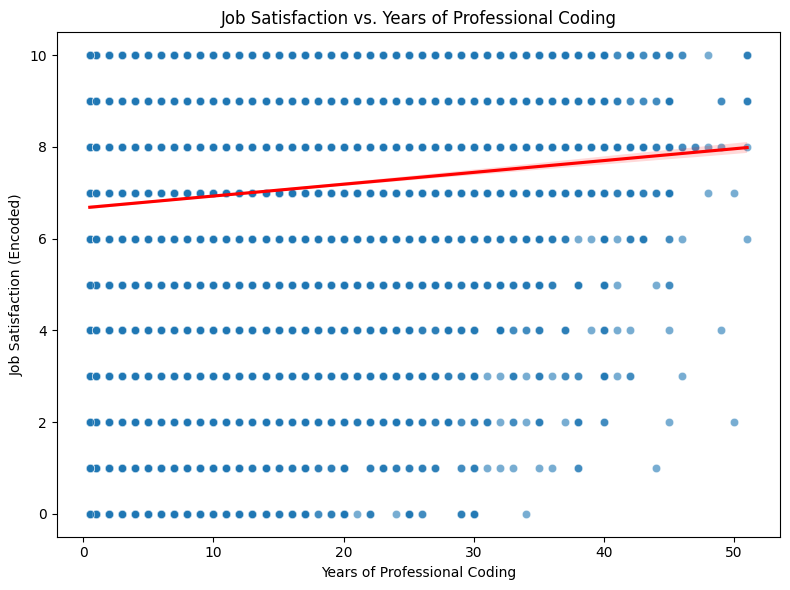

In [39]:
## Write your code here
# Drop missing values
df_clean = df.dropna(subset=['JobSat', 'YearsCodePro'])

# Convert YearsCodePro to numeric (if it's a string like 'Less than 1 year')
df_clean['YearsCodePro'] = df_clean['YearsCodePro'].replace('Less than 1 year', 0.5)
df_clean['YearsCodePro'] = df_clean['YearsCodePro'].replace('More than 50 years', 51)
df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')

# Drop any remaining NaNs
df_clean = df_clean.dropna(subset=['YearsCodePro'])

# # Optional: Encode JobSat if it's categorical
# job_sat_mapping = {
#     'Very dissatisfied': 1,
#     'Dissatisfied': 2,
#     'Neither satisfied nor dissatisfied': 3,
#     'Satisfied': 4,
#     'Very satisfied': 5
# }
# df_clean['JobSatEncoded'] = df_clean['JobSat'].map(job_sat_mapping)

from scipy.stats import pearsonr
pearson_corr, pearson_p = pearsonr(df_clean['YearsCodePro'], df_clean['JobSat'])
# print(f"Pearson correlation: {pearson_corr:.3f} (p-value: {pearson_p:.3f})")

from scipy.stats import spearmanr
spearman_corr, spearman_p = spearmanr(df_clean['YearsCodePro'], df_clean['JobSat'])
# print(f"Spearman correlation: {spearman_corr:.3f} (p-value: {spearman_p:.3f})")


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='YearsCodePro', y='JobSat', alpha=0.6)
sns.regplot(data=df_clean, x='YearsCodePro', y='JobSat', scatter=False, color='red')
plt.title('Job Satisfaction vs. Years of Professional Coding')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Job Satisfaction (Encoded)')
plt.tight_layout()
plt.show()




### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


C:\Users\HP\AppData\Local\Temp\ipykernel_2736\4204907325.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


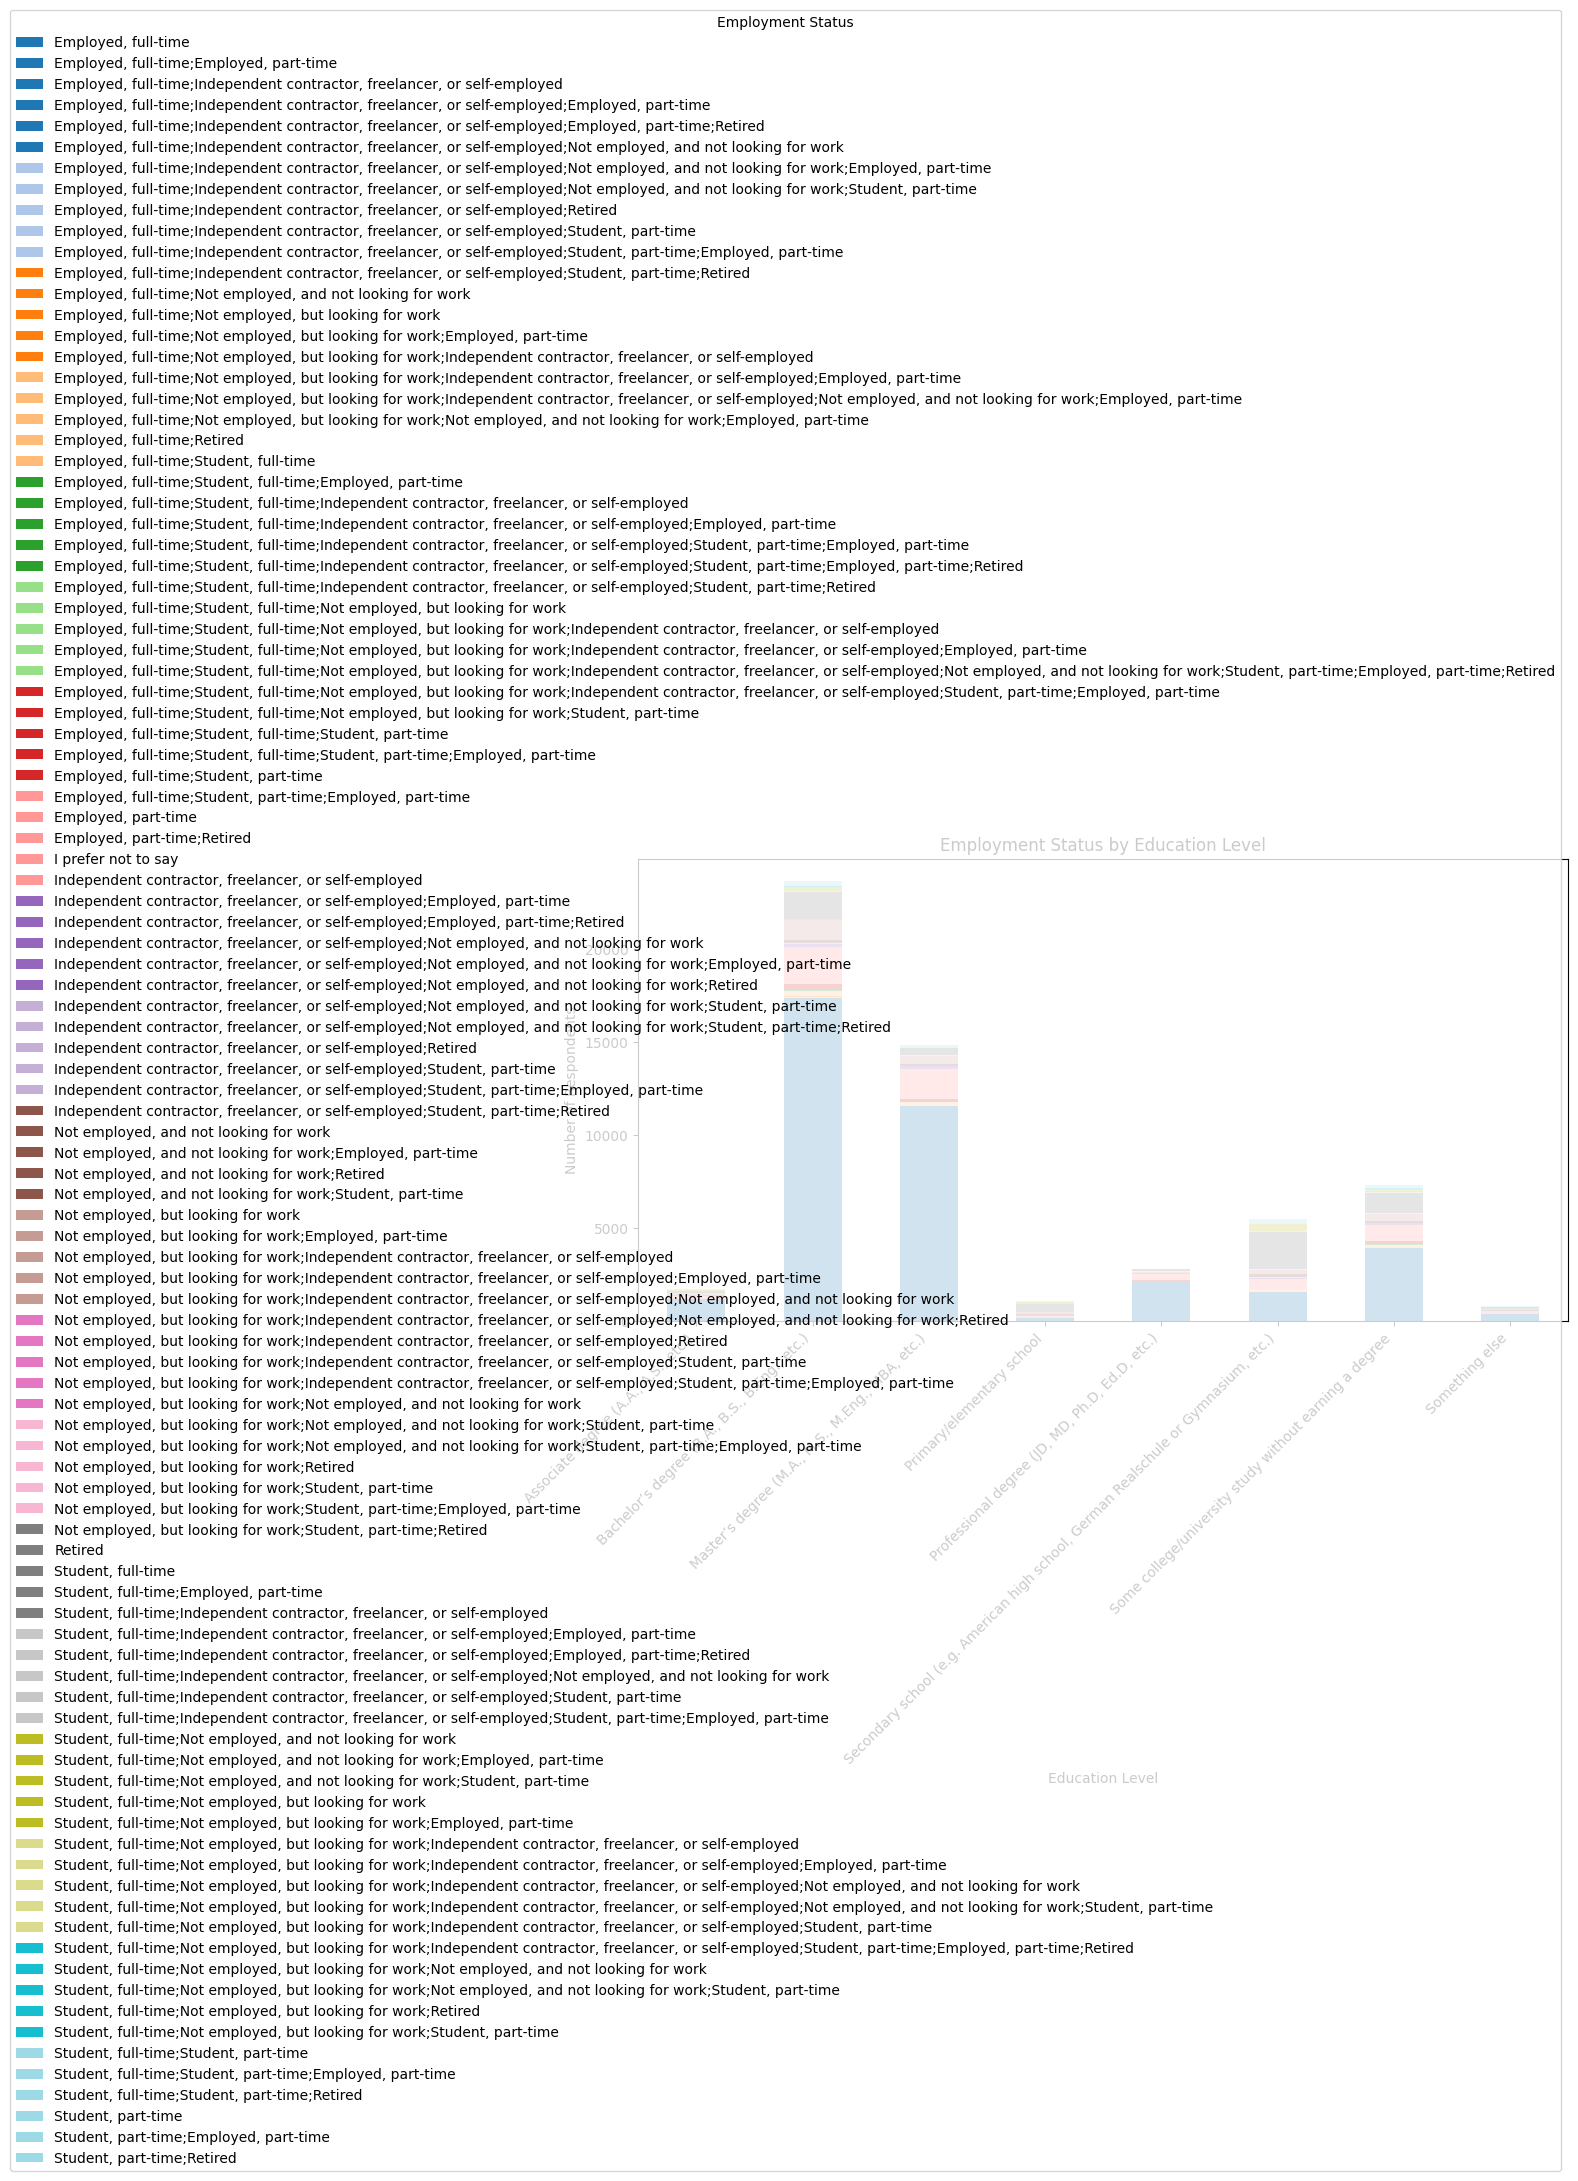

In [41]:
## Write your code here
import pandas as pd

# Drop missing values
df_clean = df.dropna(subset=['Employment', 'EdLevel'])

# Create cross-tab
employment_edu_ct = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'])

# Optional: Normalize to get proportions
employment_edu_pct = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'], normalize='index')

import matplotlib.pyplot as plt

# Plot absolute counts
employment_edu_ct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Employment Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Status', loc = 'right')
plt.tight_layout()
plt.show()



### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
